In [1]:
%matplotlib inline
import numpy as np
import pdb
import matplotlib.pyplot as plt
import glob
from matplotlib.ticker import MultipleLocator
from sklearn.model_selection import train_test_split
import sklearn.datasets as datasets
import copy
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn import preprocessing
np.random.seed(0)

In [2]:
###### handwritten digits dataset ######
digits = datasets.load_breast_cancer()
min_max_scaler = preprocessing.MinMaxScaler()

X = digits.data
Y = digits.target
X = min_max_scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=0, stratify=Y)
X_train.shape, Y_train.shape

((455, 30), (455,))

In [3]:
def hidden_layer_sizes(node_num):
    if node_num <= 16:
        return (node_num,)
    else:
        return (16, 16)

In [4]:
epochs = 100
y1 = [] # train mse
y2 = [] # test mse
node_nums = [1, 2, 4, 8, 16, 32]

In [5]:
for node_num in node_nums:
    train_error = []
    test_error = []    
    for repeat in range(3):
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes(node_num), 
                           max_iter=epochs, batch_size=32, verbose=False)
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
            mlp.fit(X_train, Y_train)
#         pred_train = mlp.predict(X_train)
#         pred_test = mlp.predict(X_test)
#         mse_train = mean_squared_error(Y_train, pred_train)
#         mse_test = mean_squared_error(Y_test, pred_test)
        train_acc = mlp.score(X_train, Y_train) * 100
        test_acc = mlp.score(X_test, Y_test) * 100
        train_error.append(train_acc)
        test_error.append(test_acc)
    y1.append(np.mean(train_error))
    y2.append(np.mean(test_error))


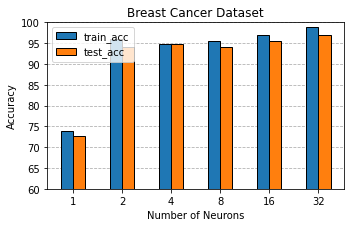

In [6]:
fig, axs = plt.subplots(1, 1, gridspec_kw={'hspace': 0.1, 'wspace': 0.2, 'bottom': 0.13, 
                                    'top': 0.9, 'right':0.995, 'left':0.17}, figsize=(5,3))
x = np.arange(len(node_nums))
offset = [-0.5, 0.5]
width = 0.25
# pdb.set_trace()
axs.bar(x+offset[0]*width, y1, width=width, label='train_acc', edgecolor='black', zorder=3)
axs.bar(x+offset[1]*width, y2, width=width, label='test_acc', edgecolor='black', zorder=3)
# axs.set_yscale('log')
axs.legend()
axs.set_xticks(x)
axs.set_xticklabels(node_nums)
axs.grid(which='major', axis='y', ls='dashed', zorder=0)
axs.set_xlabel('Number of Neurons')
axs.set_ylabel('Accuracy')
axs.set_title('Breast Cancer Dataset')
axs.set_ylim(60, 100)
fig.savefig(f'plots/p4_m2_a.png', bbox_inches='tight')

In [7]:
y_train = {} # {1: [...], 2: [...]}
y_test = {}
for node_num in node_nums:
    ind = node_nums.index(node_num)
    y_train[node_num] = []
    y_test[node_num] = []
    
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes(node_num), 
                        max_iter=20, batch_size=32, verbose=False, warm_start=True)
    for batch_inc in range(5):
        y1, y2 = [], []
        for repeat in range(3):
            if repeat == 2:
                dcp = mlp
            else:
                dcp = copy.deepcopy(mlp)
            with warnings.catch_warnings():
                warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
                dcp.fit(X_train, Y_train)
        
            mse_train = dcp.score(X_train, Y_train) * 100
            mse_test = dcp.score(X_test, Y_test) * 100
            y1.append(mse_train)
            y2.append(mse_test)
        y_train[node_num].append(np.mean(y1))
        y_test[node_num].append(np.mean(y2))

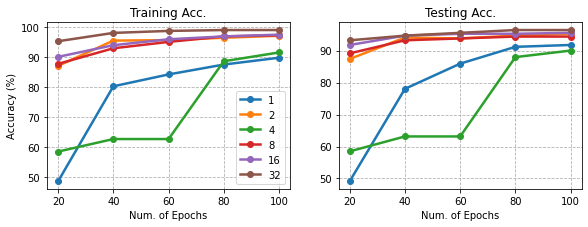

In [9]:
fig, axs = plt.subplots(1, 2, gridspec_kw={'hspace': 0.1, 'wspace': 0.2, 'bottom': 0.13, 
                                    'top': 0.9, 'right':0.995, 'left':0.17}, figsize=(9,3))
x = np.arange(20, 101, 20)
for key, val in y_train.items():
    axs[0].plot(x, val, label=key, lw=2.5, marker='o')
for key, val in y_test.items():
    axs[1].plot(x, val, label=key, lw=2.5, marker='o')
for ax in axs:
#     ax.set_yscale('log')
    ax.set_xticks(x)
    ax.grid(which='major', axis='both', ls='dashed', zorder=0)
    ax.set_xlabel('Num. of Epochs')
axs[0].legend()
axs[0].set_title('Training Acc.')
axs[1].set_title('Testing Acc.')
axs[0].set_ylabel('Accuracy (%)')
fig.savefig(f'plots/p4_m2_c.png', bbox_inches='tight')